In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set max columns and rows displayed
pd.set_option('display.max_columns', 10000)
pd.set_option('display.max_rows', 10000)

In [3]:
# Read in ACCESSolar data and cleaned Brooklyn building data
accessolar_data = pd.read_csv("../data/ACCESSolar/NYCHA_ACCESSolar_Opportunities.csv")
brooklyn_data_geo = gpd.read_file("../data/brooklyn_data.dbf")

In [4]:
# Re-acquainting myself with the ACCESSolar data
accessolar_data.head()

,DEVELOPMENT,STREET ADDRESS,POSTCODE,BOROUGH,BLDG. NUMBER,TDS NUMBER,BIN,No. of FLOORS,ROOF SPACE (Sq. Ft.),ESTIMATED ROOF SOLAR CAPACITY (kW),ADJUSTED VALUE (kW),ROOF CONDITION RATING OR REPLACEMENT DATE,No. of RESIDENTIAL UNITS,No. of TOTAL UNITS,SENIOR DEVELOPMENT (YES/NO),Latitude,Longitude,Community Board,Council District,Census Tract,BBL,NTA,Location 1
0,POLO GROUNDS TOWERS,3005 FREDERICK DOUGLASS BOULEVARD,10039,MANHATTAN,8,149,1810098,2.0,19804.34,67.25,47.07,3,0.0,0,Non-residential,NaN,NaN,10,9,24302,1021060003,Central Harlem North-Polo Grounds,NaN
1,ROBBINS PLAZA,341 EAST 70TH STREET,10021,MANHATTAN,1,218,1044841,20.0,8774.21,29.32,29.32,5,150.0,150,Yes,40.766730,-73.957495,8,5,126,1014450023,Lenox Hill-Roosevelt Island ...,"(40.76673, -73.957495)"
2,ISAACS,1806 1ST AVENUE,10128,MANHATTAN,3,139,1082365,24.0,7942.03,33.06,33.06,3,206.0,207,No,40.781684,-73.945848,8,5,152,1015730001,Yorkville ...,"(40.781684, -73.945848)"
3,ADAMS,815 EAST 152ND STREET,10455,BRONX,7,118,2091989,21.0,6279.41,43.92,30.74,2,143.0,143,No,40.815451,-73.905192,1,17,79,2026650001,Melrose South-Mott Haven North ...,"(40.815451, -73.905192)"
4,HIGHBRIDGE GARDENS,1135 UNIVERSITY AVENUE,10452,BRONX,4,78,2095218,14.0,7112.23,40.67,28.47,2,117.0,118,No,40.837014,-73.928344,4,16,193,2025270032,Highbridge ...,"(40.837014, -73.928344)"


In [12]:
# Both dataframes have BINs, so I should be able to merge them together to compare my data with the ACCESSolar data
compare_frame = accessolar_data.merge(brooklyn_data_geo, how='inner', left_on="BIN", right_on="bin")

In [15]:
# Seems to have worked
compare_frame.head()

,DEVELOPMENT,STREET ADDRESS,POSTCODE,BOROUGH,BLDG. NUMBER,TDS NUMBER,BIN,No. of FLOORS,ROOF SPACE (Sq. Ft.),ESTIMATED ROOF SOLAR CAPACITY (kW),ADJUSTED VALUE (kW),ROOF CONDITION RATING OR REPLACEMENT DATE,No. of RESIDENTIAL UNITS,No. of TOTAL UNITS,SENIOR DEVELOPMENT (YES/NO),Latitude,Longitude,Community Board,Council District,Census Tract,BBL,NTA,Location 1,address_id,bin,borocode,date_creat,time_creat,full_stree,h_no,hn_rng,hn_rng_suf,hno_suffix,hyphen_typ,date_modif,time_modif,physicalid,post_direc,post_modif,post_type,pre_direct,pre_modifi,pre_type,side_of_st,special_co,st_name,zipcode,base_bbl,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry
0,KINGSBOROUGH,553 KINGSBOROUGH 5TH WALK,11233,BROOKLYN,12,10,3331200,6.0,10108.27,53.65,37.55,1,96.0,96,No,40.674785,-73.923648,8,41,307,3013440001,Crown Heights North ...,"(40.674785, -73.923648)",3320734.0,3331200.0,3,2009-02-13,00:00:00.000,KINGSBOROUGH 5 WALK,541,None,None,None,N,2012-10-26,00:00:00.000,109481.0,None,None,WALK,None,None,None,1,None,KINGSBOROUGH 5,11233,3013440001,1950.0,34961.0,2100.0,Photogramm,90.0,57.20,2017-08-22,00:00:00.000,Constructed,3013440001,None,10108.271604,857.713236,"POLYGON ((-73.92333 40.67488, -73.92345 40.674..."
1,KINGSBOROUGH,553 KINGSBOROUGH 5TH WALK,11233,BROOKLYN,12,10,3331200,6.0,10108.27,53.65,37.55,1,96.0,96,No,40.674785,-73.923648,8,41,307,3013440001,Crown Heights North ...,"(40.674785, -73.923648)",3043779.0,3331200.0,3,2009-02-13,00:00:00.000,KINGSBOROUGH 5 WALK,529,None,None,None,N,2012-10-26,00:00:00.000,109481.0,None,None,WALK,None,None,None,1,None,KINGSBOROUGH 5,11233,3013440001,1950.0,34961.0,2100.0,Photogramm,90.0,57.20,2017-08-22,00:00:00.000,Constructed,3013440001,None,10108.271604,857.713236,"POLYGON ((-73.92333 40.67488, -73.92345 40.674..."
2,KINGSBOROUGH,553 KINGSBOROUGH 5TH WALK,11233,BROOKLYN,12,10,3331200,6.0,10108.27,53.65,37.55,1,96.0,96,No,40.674785,-73.923648,8,41,307,3013440001,Crown Heights North ...,"(40.674785, -73.923648)",3320741.0,3331200.0,3,2009-02-13,00:00:00.000,KINGSBOROUGH 5 WALK,553,None,None,None,N,2012-10-26,00:00:00.000,109481.0,None,None,WALK,None,None,None,1,None,KINGSBOROUGH 5,11233,3013440001,1950.0,34961.0,2100.0,Photogramm,90.0,57.20,2017-08-22,00:00:00.000,Constructed,3013440001,None,10108.271604,857.713236,"POLYGON ((-73.92333 40.67488, -73.92345 40.674..."
3,KINGSBOROUGH,154 KINGSBOROUGH 1ST WALK,11233,BROOKLYN,1,10,3331187,6.0,7204.66,34.31,34.31,1,72.0,72,No,40.675095,-73.927245,8,41,307,3013440001,Crown Heights North ...,"(40.675095, -73.927245)",5135729.0,3331187.0,3,2012-08-02,00:00:00.000,KINGSBOROUGH 1 WALK,142,None,None,None,N,2012-10-26,00:00:00.000,109499.0,None,None,WALK,None,None,None,2,None,KINGSBOROUGH 1,11233,3013440001,1950.0,195398.0,2100.0,Photogramm,67.0,59.29,2017-08-22,00:00:00.000,Constructed,3013440001,None,7204.663255,591.570965,"POLYGON ((-73.92746 40.67497, -73.92747 40.674..."
4,KINGSBOROUGH,154 KINGSBOROUGH 1ST WALK,11233,BROOKLYN,1,10,3331187,6.0,7204.66,34.31,34.31,1,72.0,72,No,40.675095,-73.927245,8,41,307,3013440001,Crown Heights North ...,"(40.675095, -73.927245)",5135730.0,3331187.0,3,2012-08-02,00:00:00.000,KINGSBOROUGH 1 WALK,154,None,None,None,N,2012-10-26,00:00:00.000,109499.0,None,None,WALK,None,None,None,2,None,KINGSBOROUGH 1,11233,3013440001,1950.0,195398.0,2100.0,Photogramm,67.0,59.29,2017-08-22,00:00:00.000,Constructed,3013440001,None,7204.663255,591.570965,"POLYGON ((-73.92746 40.67497, -73.92747 40.674..."


In [16]:
# Seeing how many rows came through. This is a squat little dataframe but it should do nicely
compare_frame.shape

(191, 62)

In [17]:
compare_frame.dtypes

DEVELOPMENT                                    object
STREET ADDRESS                                 object
POSTCODE                                        int64
BOROUGH                                        object
BLDG. NUMBER                                    int64
TDS NUMBER                                      int64
BIN                                             int64
No. of FLOORS                                 float64
ROOF SPACE (Sq. Ft.)                          float64
ESTIMATED ROOF SOLAR CAPACITY (kW)            float64
ADJUSTED VALUE (kW)                           float64
ROOF CONDITION RATING OR REPLACEMENT DATE      object
No. of RESIDENTIAL UNITS                      float64
No. of TOTAL UNITS                              int64
SENIOR DEVELOPMENT (YES/NO)                    object
Latitude                                      float64
Longitude                                     float64
Community Board                                 int64
Council District            

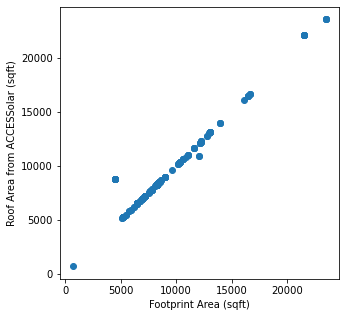

In [20]:
# Scattering the ACCESSolar roof area against the building footprint areas I used as an approximation to check how different the results are.
# I'd say that comes out extraordinarily close - looks like only two points that significantly stray from 1:1
plt.figure(figsize=(5,5))
plt.scatter(x=compare_frame['shape_area'], y=compare_frame['ROOF SPACE (Sq. Ft.)'])
plt.xlabel("Footprint Area (sqft)")
plt.ylabel("Roof Area from ACCESSolar (sqft)")
plt.savefig("../data/roof_footprint_scatter.png");

In [21]:
# Unclear on the relationship between these two
compare_frame['ROOF SPACE (Sq. Ft.)']/compare_frame['ESTIMATED ROOF SOLAR CAPACITY (kW)']

0      188.411370
1      188.411370
2      188.411370
3      209.987176
4      209.987176
5      243.028533
6      243.028533
7      177.876027
8      177.876027
9      194.886718
10     194.886718
11            inf
12     154.141445
13     154.141445
14     154.141445
15     154.141445
16     393.711140
17     393.711140
18     393.711140
19     158.575908
20     158.575908
21     158.575908
22     194.770642
23     194.770642
24     215.530289
25     215.530289
26     215.530289
27     215.530289
28     291.391543
29     291.391543
30     291.391543
31     291.391543
32     210.785085
33     210.785085
34     201.989511
35     201.989511
36     201.989511
37     201.109873
38     201.109873
39     184.746292
40     184.746292
41     195.584815
42     195.584815
43     202.291200
44     202.291200
45     146.807102
46     205.474023
47     205.474023
48     118.712947
49     199.932236
50     199.932236
51     199.932236
52     174.993528
53     174.993528
54     174.993528
55     207

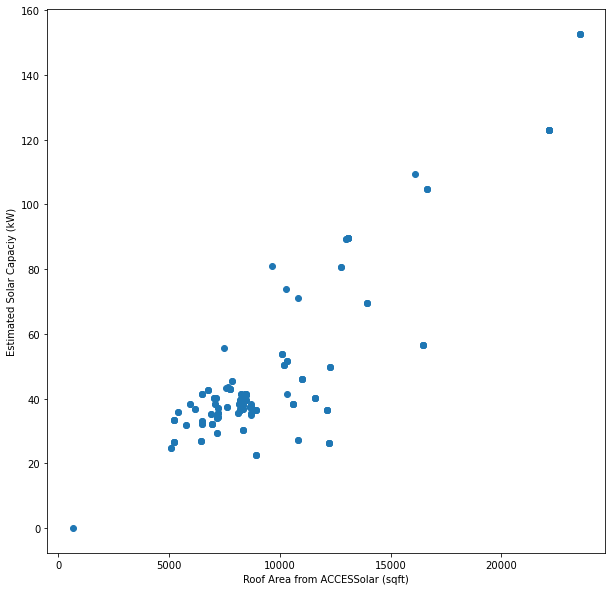

In [24]:
# Scatter of roof space and solar capacity as determined by ACCESSolar
# It's also approximately linear but MUCH more roughly
plt.figure(figsize=(10,10))
plt.scatter(x=compare_frame['ROOF SPACE (Sq. Ft.)'], y=compare_frame['ESTIMATED ROOF SOLAR CAPACITY (kW)'])
plt.xlabel("Roof Area from ACCESSolar (sqft)")
plt.ylabel("Estimated Solar Capaciy (kW)")
plt.savefig("../data/area_capacity_scatter.png");

In [27]:
# Adding this as a column so I can compare it more easily
compare_frame['capacity_ratio'] = compare_frame['ROOF SPACE (Sq. Ft.)']/compare_frame['ESTIMATED ROOF SOLAR CAPACITY (kW)']

In [31]:
# Checking for a relationship with roof condition - can't scatter it or anything because of inconsistent data types
compare_frame[['capacity_ratio', 'ROOF CONDITION RATING OR REPLACEMENT DATE', 'feat_code']].sort_values('capacity_ratio', ascending=False)

,capacity_ratio,ROOF CONDITION RATING OR REPLACEMENT DATE,feat_code
11,inf,3,5110.0
155,465.558397,2.6,2100.0
154,465.558397,2.6,2100.0
153,465.558397,2.6,2100.0
156,465.558397,2.6,2100.0
145,396.878843,Replaced 11/16,2100.0
146,396.878843,Replaced 11/16,2100.0
17,393.711140,2,2100.0
18,393.711140,2,2100.0
16,393.711140,2,2100.0


In [32]:
# These numbers seem to repeat a lot
compare_frame.loc[57:60]

,DEVELOPMENT,STREET ADDRESS,POSTCODE,BOROUGH,BLDG. NUMBER,TDS NUMBER,BIN,No. of FLOORS,ROOF SPACE (Sq. Ft.),ESTIMATED ROOF SOLAR CAPACITY (kW),ADJUSTED VALUE (kW),ROOF CONDITION RATING OR REPLACEMENT DATE,No. of RESIDENTIAL UNITS,No. of TOTAL UNITS,SENIOR DEVELOPMENT (YES/NO),Latitude,Longitude,Community Board,Council District,Census Tract,BBL,NTA,Location 1,address_id,bin,borocode,date_creat,time_creat,full_stree,h_no,hn_rng,hn_rng_suf,hno_suffix,hyphen_typ,date_modif,time_modif,physicalid,post_direc,post_modif,post_type,pre_direct,pre_modifi,pre_type,side_of_st,special_co,st_name,zipcode,base_bbl,cnstrct_yr,doitt_id,feat_code,geomsource,groundelev,heightroof,date_lstmo,time_lstmo,lststatype,mpluto_bbl,name,shape_area,shape_len,geometry,capacity_ratio
57,GARVEY (GROUP A),1400 EAST NEW YORK AVENUE,11212,BROOKLYN,3,252,3333363,14.0,13954.77,69.62,48.73,3,117.0,117,No,40.670105,-73.915827,16,41,902,3034940010,Brownsville ...,"(40.670105, -73.915827)",3107238.0,3333363.0,3,2009-02-13,00:00:00.000,STRAUSS ST,1819,None,None,None,N,2012-10-04,00:00:00.000,72913.0,None,None,ST,None,None,None,1,None,STRAUSS,11212,3034940010,1974.0,431357.0,2100.0,Photogramm,48.0,146.80,2017-08-22,00:00:00.000,Constructed,3034940010,None,13954.768285,857.000422,"POLYGON ((-73.91588 40.66981, -73.91582 40.669...",200.441971
58,GARVEY (GROUP A),1400 EAST NEW YORK AVENUE,11212,BROOKLYN,3,252,3333363,14.0,13954.77,69.62,48.73,3,117.0,117,No,40.670105,-73.915827,16,41,902,3034940010,Brownsville ...,"(40.670105, -73.915827)",3107237.0,3333363.0,3,2009-02-13,00:00:00.000,E NEW YORK AVE,1380,None,None,None,N,2012-10-04,00:00:00.000,71999.0,None,None,AVE,E,None,None,2,None,NEW YORK,11212,3034940010,1974.0,431357.0,2100.0,Photogramm,48.0,146.80,2017-08-22,00:00:00.000,Constructed,3034940010,None,13954.768285,857.000422,"POLYGON ((-73.91588 40.66981, -73.91582 40.669...",200.441971
59,GARVEY (GROUP A),1400 EAST NEW YORK AVENUE,11212,BROOKLYN,3,252,3333363,14.0,13954.77,69.62,48.73,3,117.0,117,No,40.670105,-73.915827,16,41,902,3034940010,Brownsville ...,"(40.670105, -73.915827)",5137818.0,3333363.0,3,2012-10-04,00:00:00.000,E NEW YORK AVE,1400,None,None,None,N,2012-10-04,00:00:00.000,71999.0,None,None,AVE,E,None,None,2,None,NEW YORK,11212,3034940010,1974.0,431357.0,2100.0,Photogramm,48.0,146.80,2017-08-22,00:00:00.000,Constructed,3034940010,None,13954.768285,857.000422,"POLYGON ((-73.91588 40.66981, -73.91582 40.669...",200.441971
60,GLENWOOD,5712 FARRAGUT ROAD,11234,BROOKLYN,10,44,3331019,6.0,8221.01,38.93,38.93,Replaced 10/16,60.0,60,No,40.636283,-73.921476,18,45,94402,3079780001,Flatlands ...,"(40.636283, -73.921476)",3279942.0,3331019.0,3,2009-02-13,00:00:00.000,FARRAGUT RD,5714,None,None,None,N,2012-10-04,00:00:00.000,65781.0,None,None,RD,None,None,None,2,None,FARRAGUT,11234,3079780001,1948.0,585449.0,2100.0,Photogramm,14.0,56.94,2017-08-22,00:00:00.000,Constructed,3079780001,None,8221.011274,725.071033,"POLYGON ((-73.92115 40.63567, -73.92114 40.635...",211.174159


In [34]:
# Yeah, okay, let's see how many UNIQUE data points we have
# Not what I expected
compare_frame.duplicated().sum()

0

In [35]:
# Ooooooh, I joined on BIN so multiple addresses are still registering on the same BIN and creating rows which are ALMOST, but not quite, identical. got it. 
# Let's see how many unique buildings we have in compare_frame
compare_frame['BIN'].duplicated().sum()

112

In [37]:
# For this purpose, I'll just work with those
compare_frame.drop(compare_frame[compare_frame['BIN'].duplicated()].index, inplace=True)

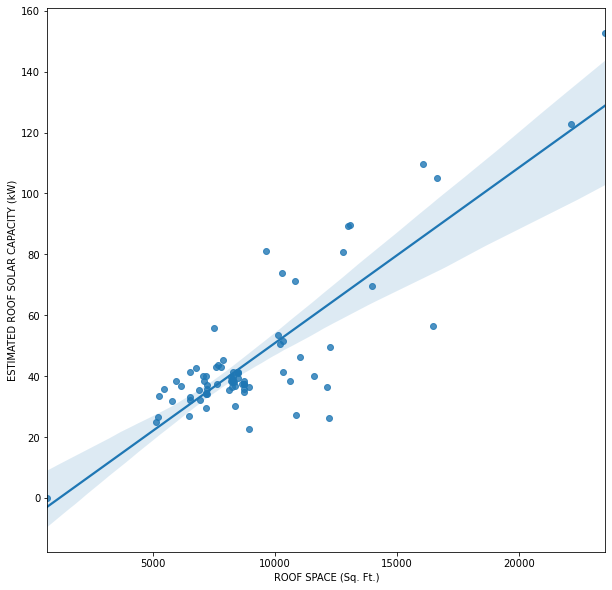

In [41]:
# Quick and dirty regplot now that I have duplicates cleared out
plt.figure(figsize=(10,10))
sns.regplot(x=compare_frame['ROOF SPACE (Sq. Ft.)'], y=compare_frame['ESTIMATED ROOF SOLAR CAPACITY (kW)']);

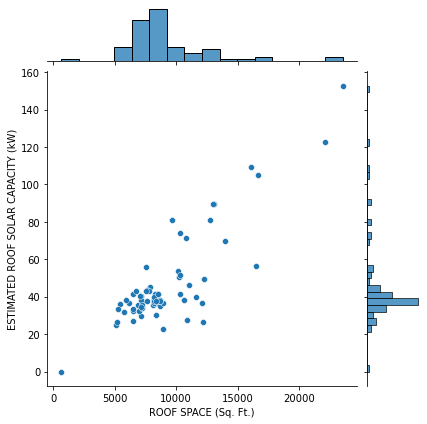

In [48]:
# Quick and dirty jointplot
sns.jointplot(x=compare_frame['ROOF SPACE (Sq. Ft.)'], y=compare_frame['ESTIMATED ROOF SOLAR CAPACITY (kW)'])
plt.savefig("../data/area_capacity_joint.png");

In [50]:
# Looks like ACCESSolar came out to roughly 200 square feet per kilowatt of capacity
# They also include another column of adjusted estimates where the estimated capacity is lowered by 30% for larger roofs with an estimate over 40 kW
compare_frame['capacity_ratio'].median()

205.47402335884013

In [51]:
# Statistics on current solar panels available for residential use suggest that they are generally about 40"x65" and have a nameplate capacity over 300 W.
# Assuming the panels could be closely placed across an entire roof, this would suggest a ratio closer to 60 square feet per kilowatt of nameplate capacity.
# These two values are obviously dramatically different, so we will have to further evaluate what ratio to use to approximate system capacities from roof areas. 